In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("2016-FCC-New-Coders-Survey-Data.csv", low_memory=False)

In [3]:
#Functions


def category_education(degree):
    #Group degrees into two categories
    high_eduction = ["associate's degree","bachelor's degree","master's degree (non-professional)","professional degree (MBA, MD, JD, etc.)","Ph.D."]
    
    if(degree in high_eduction):
        return "High-Education"
    else:
        return "Low-Education"

In [4]:
list(df);

In [5]:
len(df)

15620

In [6]:
# Drop rows where either CountryLive or SchoolDegree was not given(NaN)
df = df.dropna(axis=0, subset = ['CountryLive', 'SchoolDegree'])

In [7]:
len(df)

13506

In [8]:
#Columns to consider
selected_columns = ["CountryLive","SchoolDegree","ResourceBlogs","ResourceBooks","ResourceCodecademy","ResourceCodeWars","ResourceCoursera","ResourceDevTips",        "ResourceEdX","ResourceEggHead","ResourceFCC","ResourceGoogle","ResourceHackerRank","ResourceKhanAcademy","ResourceLynda",        "ResourceMDN","ResourceOdinProj","ResourceOther","ResourcePluralSight","ResourceReddit","ResourceSkillCrush","ResourceSoloLearn",        "ResourceStackOverflow","ResourceTreehouse","ResourceUdacity","ResourceUdemy","ResourceW3Schools","ResourceYouTube"]

In [9]:
df_selected = df.loc[:,selected_columns]

In [12]:
df_selected.columns;

In [13]:
#Simplify naming of columns
columns_titles = [column.replace('Resource','') for column in list(df_selected.columns)]

In [14]:
df_selected.set_axis(columns_titles, axis='columns', inplace=True)

In [16]:
df_selected;

In [18]:
# Create column with Higher or Lower Eduation categorization noted. (The below is a warning--rather inexplicable as I am already using the suggested code fix. The code works)
df_selected.loc[:, 'GroupEducation'] = df_selected.apply(lambda row: category_education(row['SchoolDegree']), axis=1);
# print(df_selected)

In [19]:
#Create column with sum of resources used. (The below is a warning--rather inexplicable as I am already using the suggested code fix. The code works)
df_selected.loc[:, 'TotalResources'] = df_selected.sum(axis=1)

In [21]:
df_selected;

In [22]:
#Sum Columns of Resources (ie, the only columns in this df containing numerical values)
sums = df_selected.select_dtypes(pd.np.number).sum().rename('total')

In [23]:
#Append the total for each resource to the df
df_selected_sums = df_selected.append(sums)

In [24]:
sums[:-1].idxmax()
sums_without_totalOfAllResources = sums[:-1]
sums_without_totalOfAllResources.idxmax()

'FCC'

In [35]:
#This shows the global ranking (and count) for online resources used.
sums_without_totalOfAllResources.sort_values(ascending=False);

In [27]:
df_high_education = df_selected[df_selected.GroupEducation == 'High-Education']
sums = df_high_education.select_dtypes(pd.np.number).sum().rename('total')
df_high_education_sums = df_high_education.append(sums)

In [28]:
df_low_education = df_selected[df_selected.GroupEducation == 'Low-Education']
sums = df_low_education.select_dtypes(pd.np.number).sum().rename('total')
df_low_education_sums = df_low_education.append(sums)

In [29]:
#Print statistic data

df_total_education = df_selected['TotalResources']

totals_for_all = df_selected_sums.tail(1).apply(lambda x: x.tolist(), axis=1)
totals_for_all_list = totals_for_all[0]
totals_for_all_sliced = totals_for_all_list[2:-2]
totals_for_all = [0.0 if str(el) == 'nan' else el for el in totals_for_all_sliced]

print('Total Resources:\n')
print(df_total_education.describe())

df_high_education = df_selected[df_selected.GroupEducation == 'High-Education']

totals_high_ed = df_high_education_sums.tail(1).apply(lambda x: x.tolist(), axis=1)
totals_high_ed_list = totals_high_ed[0]
totals_high_ed_sliced = totals_high_ed_list[2:-2]
totals_high_ed = [0.0 if str(el) == 'nan' else el for el in totals_high_ed_sliced]

df_high_education = df_high_education['TotalResources']
print('\nTotal Resources for High Education:\n')
print(df_high_education.describe())

df_low_education = df_selected[df_selected.GroupEducation == 'Low-Education']

totals_low_ed = df_low_education_sums.tail(1).apply(lambda x: x.tolist(), axis=1)
totals_low_ed_list = totals_low_ed[0]
totals_low_ed_sliced = totals_low_ed_list[2:-2]
totals_low_ed = [0.0 if str(el) == 'nan' else el for el in totals_low_ed_sliced]


df_low_education = df_low_education['TotalResources']
print('\nTotal Resources for Low Education:\n')
print(df_low_education.describe())

Total Resources:

count    13506.000000
mean         3.198652
std          1.893656
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         14.000000
Name: TotalResources, dtype: float64

Total Resources for High Education:

count    8491.000000
mean        3.170651
std         1.855490
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: TotalResources, dtype: float64

Total Resources for Low Education:

count    5015.000000
mean        3.246062
std         1.955853
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        14.000000
Name: TotalResources, dtype: float64


In [30]:
#Histogram
def create_histogram(description, df_total_education, df_high_education, df_low_education, columns_titles):
    plt.figure(figsize=(15,5))
    bins = [x//2 for x in range(len(columns_titles))]
    plt.hist(df_total_education, bins, histtype='step',stacked = True, rwidth = 0.8, label='Total', color='#000066')
    plt.hist(df_high_education, bins, histtype='bar', stacked = True, rwidth = 0.6, label='High-Education', color = '#3366FF')
    plt.hist(df_low_education, bins, histtype='bar', stacked = True, rwidth = 0.4, label='Low-Education', color = '#99CCFF')
    plt.xlabel('Number of resources utilised')
    plt.ylabel('Frequency')
    plt.title('Histogram of resources - ' + description)
    plt.grid(False)
    plt.legend()
    plt.show()
    
#Bar graph
def create_bar_graph(description, df_total_education, df_high_education, df_low_education, columns_titles):
    plt.figure(figsize=(15,5))
    labels = columns_titles[2:]
    x_bar = [i for i, _ in enumerate(labels)]
    plt.bar(x_bar, totals_for_all, width = 0.80, edgecolor = '#000066', facecolor = 'w', label='Total')
    plt.bar(x_bar, totals_high_ed, width = 0.60, color = '#3366FF', label='High-Education') 
    plt.bar(x_bar, totals_low_ed, width = 0.40, color = '#99CCFF', label='Low-Education') 
    plt.xlabel('By resource')
    plt.ylabel('Number of people')
    plt.xticks(x_bar, labels, rotation='vertical')
    plt.legend()
    plt.title('Barplot resources usage - ' + description)
    plt.grid(True, color = '#CCCCCC')
    plt.show()

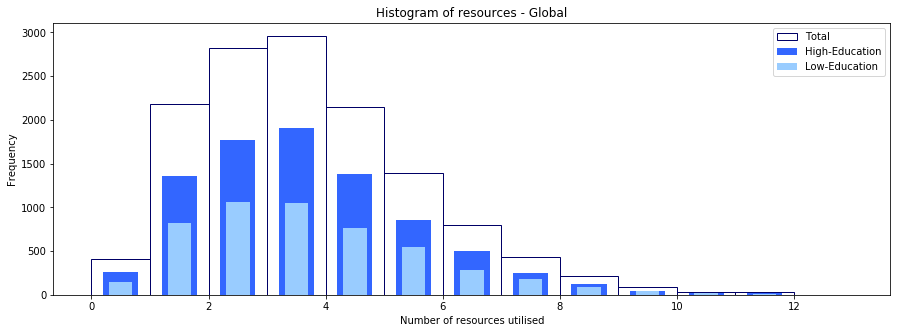

In [31]:
create_histogram('Global', df_total_education, df_high_education, df_low_education, columns_titles)

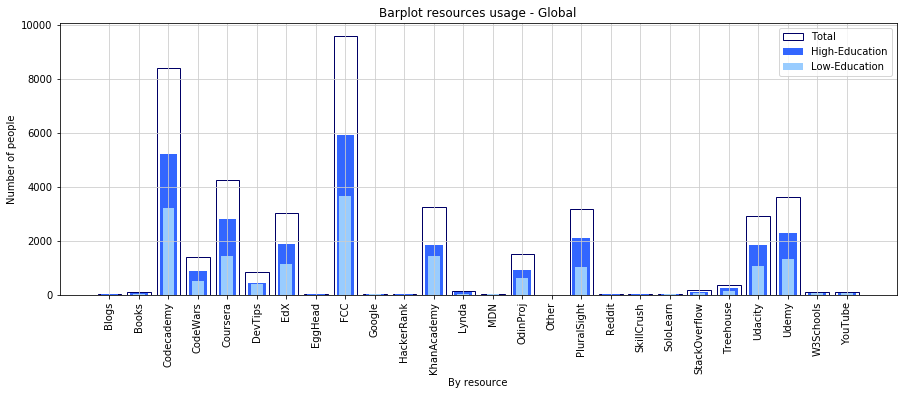

In [32]:
create_bar_graph('Global', df_total_education, df_high_education, df_low_education, columns_titles)